<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [51]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

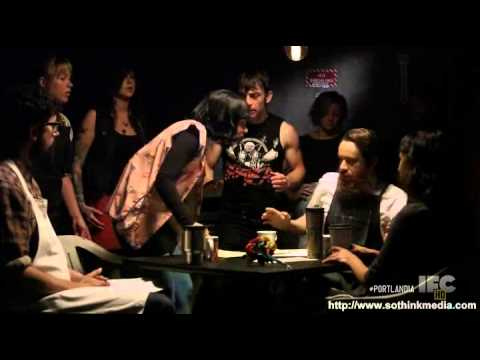

In [53]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [54]:
%pwd

'/Users/andrewrust/Desktop/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [169]:
import pandas as pd

url = "/Users/andrewrust/Desktop/DS-Unit-4-Sprint-1-NLP/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head(6)

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0 star rating


In [87]:
import pandas as pd
value = shops.loc[1, 'full_review_text']
value2 = shops.loc[2, 'full_review_text']
print(value)
print(value2)

 12/2/2016 Listed in Date Night: Austin, Ambiance in Austin BEAUTIFUL!!!! Love the ambiance! Instagram-worthy!!!  Definitely $$$, so be prepared. This is gonna cost you a pretty penny :) Waffle dessert was just decent...nothing to rave about.  But, will probably be back just to be somewhere unique and nice. 
 11/30/2016 1 check-in Listed in Brunch Spots I loved the eclectic and homey plush decor and who doesn't want to swing and drink their coffee?  I would categorize this as a pricier coffee place but, to me it was worth it.  After Thanksgiving nobody wants to make brunch so we headed out in search of chicken and waffles.  There is ample parking in the private lot and  ordering is done through I-Pads.  Pick a seat and they will call your name when your items are ready.  Be patient because some of the coffee drinks take longer than others.  I had the cold brew coffee, chicken and waffles and we shared a pop+art!  The po+art was strawberry; light and fluffy on the outside and gooey swee

In [88]:
value.split(" ")

['',
 '12/2/2016',
 'Listed',
 'in',
 'Date',
 'Night:',
 'Austin,',
 'Ambiance',
 'in',
 'Austin',
 'BEAUTIFUL!!!!',
 'Love',
 'the',
 'ambiance!',
 'Instagram-worthy!!!',
 '',
 'Definitely',
 '$$$,',
 'so',
 'be',
 'prepared.',
 'This',
 'is',
 'gonna',
 'cost',
 'you',
 'a',
 'pretty',
 'penny',
 ':)',
 'Waffle',
 'dessert',
 'was',
 'just',
 'decent...nothing',
 'to',
 'rave',
 'about.',
 '',
 'But,',
 'will',
 'probably',
 'be',
 'back',
 'just',
 'to',
 'be',
 'somewhere',
 'unique',
 'and',
 'nice.',
 '']

In [ ]:
# Don't run this cell
# This is the text from one of the rows 
12/2/2016 Listed in Date Night: Austin, Ambiance 
in Austin BEAUTIFUL!!!! Love the ambiance! Instagram-worthy!!!  
Definitely $$$, so be prepared. This is gonna cost you a pretty penny 
:) Waffle dessert was just decent...nothing to rave about.  
    But, will probably be back just to be somewhere unique and nice.

In [157]:
# need the space in there
sample = re.sub('[^a-zA-Z ]', '', value)

In [161]:
print(sample)

  Listed in Date Night Austin Ambiance in Austin BEAUTIFUL Love the ambiance Instagramworthy  Definitely  so be prepared This is gonna cost you a pretty penny  Waffle dessert was just decentnothing to rave about  But will probably be back just to be somewhere unique and nice 


In [90]:
# Start here 
shops['coffee_shop_name'].value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
                                       ... 
Lucky Lab Coffee                         25
Sister Coffee                            17
Kowabunga Coffee                         16
The Marvelous Vintage Tea Party Co.      10
Lola Savannah Coffee Downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

In [91]:
shops.shape

(7616, 3)

In [127]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    # substitute with nothing
    tokens = re.sub('[^a-zA-Z ]', '', text)
    tokens2 = tokens.lower().split()
    
    return tokens2

In [128]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [129]:
shops['tokens'].head()

0    [checkin, love, love, loved, the, atmosphere, ...
1    [listed, in, date, night, austin, ambiance, in...
2    [checkin, listed, in, brunch, spots, i, loved,...
3    [very, cool, decor, good, drinks, nice, seatin...
4    [checkin, they, are, located, within, the, nor...
Name: tokens, dtype: object

In [115]:
shops.head(2)

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[checkin, love, love, loved, the, atmosphere, ..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[listed, in, date, night, austin, ambiance, in..."


In [130]:
shops[['full_review_text', 'tokens']][:10]

,full_review_text,tokens
0,11/25/2016 1 check-in Love love loved the atm...,"[checkin, love, love, loved, the, atmosphere, ..."
1,"12/2/2016 Listed in Date Night: Austin, Ambia...","[listed, in, date, night, austin, ambiance, in..."
2,11/30/2016 1 check-in Listed in Brunch Spots ...,"[checkin, listed, in, brunch, spots, i, loved,..."
3,11/25/2016 Very cool decor! Good drinks Nice ...,"[very, cool, decor, good, drinks, nice, seatin..."
4,12/3/2016 1 check-in They are located within ...,"[checkin, they, are, located, within, the, nor..."
5,11/20/2016 1 check-in Very cute cafe! I think...,"[checkin, very, cute, cafe, i, think, from, th..."
6,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...","[checkins, listed, in, nuptial, coffee, bliss,..."
7,11/2/2016 2 check-ins Love this place! 5 sta...,"[checkins, love, this, place, stars, for, clea..."
8,"10/25/2016 1 check-in Ok, let's try this appr...","[checkin, ok, lets, try, this, approach, pros,..."
9,11/10/2016 3 check-ins This place has been sh...,"[checkins, this, place, has, been, shown, on, ..."


In [131]:
value3 = shops.loc[1, 'star_rating']
print(value3)

 4.0 star rating 


In [132]:
re.sub('[^1-9]', '', value3)

'4'

In [133]:
def tokenize_rating(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    # substitute with nothing
    tokens_a = re.sub('[^1-9]', '', text)
    
    return tokens_a

In [134]:
shops['rating_number'] = shops['star_rating'].apply(tokenize_rating)

In [135]:
shops.head(5)

,coffee_shop_name,full_review_text,star_rating,tokens,rating_number
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[checkin, love, love, loved, the, atmosphere, ...",5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[listed, in, date, night, austin, ambiance, in...",4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[checkin, listed, in, brunch, spots, i, loved,...",4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[very, cool, decor, good, drinks, nice, seatin...",2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[checkin, they, are, located, within, the, nor...",4


In [136]:
shops.dtypes

coffee_shop_name    object
full_review_text    object
star_rating         object
tokens              object
rating_number       object
dtype: object

In [137]:
value_a = shops.loc[1, 'rating_number']
print(value_a)

4


In [141]:
shops["rating_number"] = pd.to_numeric(shops["rating_number"])

In [142]:
shops.dtypes

coffee_shop_name    object
full_review_text    object
star_rating         object
tokens              object
rating_number        int64
dtype: object

In [143]:
shops.head(5)

,coffee_shop_name,full_review_text,star_rating,tokens,rating_number
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[checkin, love, love, loved, the, atmosphere, ...",5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[listed, in, date, night, austin, ambiance, in...",4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[checkin, listed, in, brunch, spots, i, loved,...",4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[very, cool, decor, good, drinks, nice, seatin...",2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[checkin, they, are, located, within, the, nor...",4


In [145]:
import numpy as np
# create a list of our conditions
conditions = [
    (shops['rating_number'] <= 3),
    (shops['rating_number'] > 3)
    ]

# create a list of the values we want to assign for each condition
values = ['bad', 'good']

# create a new column and use np.select to assign values to it using our lists as arguments
shops['favorbility'] = np.select(conditions, values)

# display updated DataFrame
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,rating_number,favorbility
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[checkin, love, love, loved, the, atmosphere, ...",5,good
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[listed, in, date, night, austin, ambiance, in...",4,good
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[checkin, listed, in, brunch, spots, i, loved,...",4,good
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[very, cool, decor, good, drinks, nice, seatin...",2,bad
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[checkin, they, are, located, within, the, nor...",4,good


In [146]:
shops[['rating_number', 'favorbility']][:10]

,rating_number,favorbility
0,5,good
1,4,good
2,4,good
3,2,bad
4,4,good
5,4,good
6,4,good
7,5,good
8,3,bad
9,5,good


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [147]:
shops['favorbility'].value_counts()

good    6140
bad     1476
Name: favorbility, dtype: int64

In [148]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26651),
 ('a', 22756),
 ('i', 20249),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10354),
 ('was', 9707),
 ('in', 9546)]

In [149]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [150]:
# Use the Function
wc = count(shops['tokens'])

In [152]:
wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
38,the,6847,34809,1.0,0.045412,0.045412,0.899028
16,and,6864,26651,2.0,0.034769,0.080180,0.901261
69,a,6246,22756,3.0,0.029687,0.109868,0.820116
4,i,5532,20249,4.0,0.026417,0.136284,0.726366
15,to,5653,17164,5.0,0.022392,0.158676,0.742253
5,of,5100,12600,6.0,0.016438,0.175114,0.669643
73,is,4999,11999,7.0,0.015654,0.190768,0.656381
12,coffee,4877,10354,8.0,0.013508,0.204276,0.640362
0,was,3765,9707,9.0,0.012664,0.216939,0.494354
78,in,4563,9546,10.0,0.012454,0.229393,0.599133


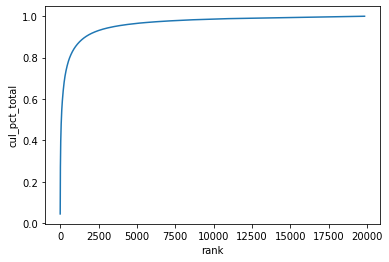

In [153]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);
# rare words are over on the right not used very often

In [154]:
# top 100 words by rank account for 54% of all words 
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.5426164642156858

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


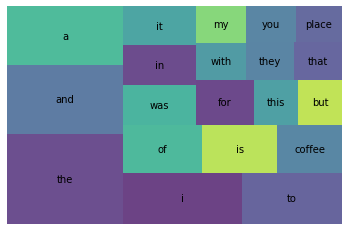

In [155]:
# color is random
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [156]:
import spacy
from spacy.tokenizer import Tokenizer

# nlp object is the core object for english corpus
nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [158]:
print(sample)

  Listed in Date Night Austin Ambiance in Austin BEAUTIFUL Love the ambiance Instagramworthy  Definitely  so be prepared This is gonna cost you a pretty penny  Waffle dessert was just decentnothing to rave about  But will probably be back just to be somewhere unique and nice 


In [159]:
# Print out list of tokens
[token.text for token in tokenizer(sample)]

['  ',
 'Listed',
 'in',
 'Date',
 'Night',
 'Austin',
 'Ambiance',
 'in',
 'Austin',
 'BEAUTIFUL',
 'Love',
 'the',
 'ambiance',
 'Instagramworthy',
 ' ',
 'Definitely',
 ' ',
 'so',
 'be',
 'prepared',
 'This',
 'is',
 'gonna',
 'cost',
 'you',
 'a',
 'pretty',
 'penny',
 ' ',
 'Waffle',
 'dessert',
 'was',
 'just',
 'decentnothing',
 'to',
 'rave',
 'about',
 ' ',
 'But',
 'will',
 'probably',
 'be',
 'back',
 'just',
 'to',
 'be',
 'somewhere',
 'unique',
 'and',
 'nice']

In [160]:
shops.head(5)

,coffee_shop_name,full_review_text,star_rating,tokens,rating_number,favorbility
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[checkin, love, love, loved, the, atmosphere, ...",5,good
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[listed, in, date, night, austin, ambiance, in...",4,good
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[checkin, listed, in, brunch, spots, i, loved,...",4,good
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[very, cool, decor, good, drinks, nice, seatin...",2,bad
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[checkin, they, are, located, within, the, nor...",4,good


In [162]:
print(value)

 12/2/2016 Listed in Date Night: Austin, Ambiance in Austin BEAUTIFUL!!!! Love the ambiance! Instagram-worthy!!!  Definitely $$$, so be prepared. This is gonna cost you a pretty penny :) Waffle dessert was just decent...nothing to rave about.  But, will probably be back just to be somewhere unique and nice. 


In [163]:
re.sub('[^a-zA-Z ]', '', value)

'  Listed in Date Night Austin Ambiance in Austin BEAUTIFUL Love the ambiance Instagramworthy  Definitely  so be prepared This is gonna cost you a pretty penny  Waffle dessert was just decentnothing to rave about  But will probably be back just to be somewhere unique and nice '

In [170]:
def remove_date(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    # substitute with nothing
    no_date = re.sub('[^a-zA-Z ]', '', text)
    no_date_b = no_date.lower()
    
    return no_date_b

In [171]:
shops['no_date'] = shops['full_review_text'].apply(remove_date)

In [172]:
shops.head(5)

,coffee_shop_name,full_review_text,star_rating,no_date
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,checkin love love loved the atmosphere ever...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,listed in date night austin ambiance in aust...
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,checkin listed in brunch spots i loved the ...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,very cool decor good drinks nice seating ho...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,checkin they are located within the northcr...


In [174]:
# Tokenizer Pipe
tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops['no_date'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['spacey_tokens'] = tokens

In [175]:
shops['spacey_tokens'].head()

0    [   , checkin, love, love, loved, the, atmosph...
1    [  , listed, in, date, night, austin, ambiance...
2    [   , checkin, listed, in, brunch, spots, i, l...
3    [  , very, cool, decor, good, drinks, nice, se...
4    [   , checkin, they, are, located, within, the...
Name: spacey_tokens, dtype: object

In [177]:
wc = count(shops['spacey_tokens'])

In [178]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
38,the,6847,34809,1.0,0.043636,0.043636,0.899028
16,and,6864,26651,2.0,0.033410,0.077046,0.901261
71,a,6246,22756,3.0,0.028527,0.105573,0.820116
62,,5410,21982,4.0,0.027557,0.133129,0.710347
4,i,5532,20249,5.0,0.025384,0.158513,0.726366


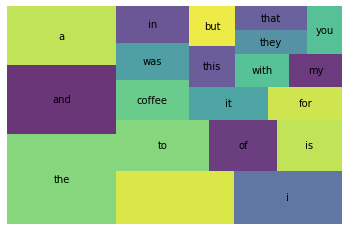

In [181]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [182]:
print(type(nlp.Defaults.stop_words))

<class 'set'>


In [183]:
STOP_WORDS = nlp.Defaults.stop_words.union(['  ', 'I', 'i', 'it', "it's", 'it.', 'the', 'this',])

In [184]:
STOP_WORDS

{'  ',
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'I',
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 '

In [185]:
tokens = []

for doc in tokenizer.pipe(shops['no_date'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['spacey_tokens2'] = tokens

In [186]:
shops['spacey_tokens2'].head()

0    [   , checkin, love, love, loved, atmosphere, ...
1    [listed, date, night, austin, ambiance, austin...
2    [   , checkin, listed, brunch, spots, loved, e...
3    [cool, decor, good, drinks, nice, seating,  , ...
4    [   , checkin, located, northcross, mall, shop...
Name: spacey_tokens2, dtype: object

In [187]:
wc = count(shops['spacey_tokens2'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
35,,5410,21982,1.0,0.056896,0.056896,0.710347
7,coffee,4877,10354,2.0,0.026799,0.083696,0.640362
138,place,3659,5426,3.0,0.014044,0.097740,0.480436
152,good,2788,3973,4.0,0.010283,0.108024,0.366071
70,great,2836,3919,5.0,0.010144,0.118167,0.372374


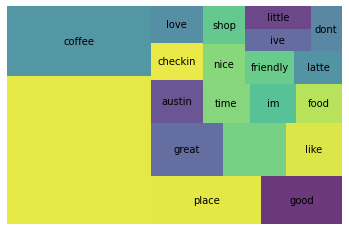

In [188]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

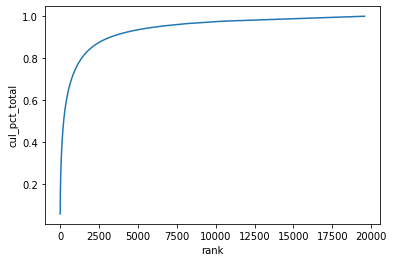

In [189]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [190]:
wc.tail(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
19545,greys,1,1,19550.0,0.000003,0.999951,0.000131
19548,cinnamonheavy,1,1,19551.0,0.000003,0.999953,0.000131
19549,shelby,1,1,19552.0,0.000003,0.999956,0.000131
19554,jennifers,1,1,19553.0,0.000003,0.999959,0.000131
19552,foodgasm,1,1,19554.0,0.000003,0.999961,0.000131
19551,lentil,1,1,19555.0,0.000003,0.999964,0.000131
19553,soupomg,1,1,19556.0,0.000003,0.999966,0.000131
19550,mum,1,1,19557.0,0.000003,0.999969,0.000131
19555,uneventful,1,1,19558.0,0.000003,0.999972,0.000131
19556,prebought,1,1,19559.0,0.000003,0.999974,0.000131


In [191]:
wc['appears_in_pct'].describe()

count    19569.000000
mean         0.002151
std          0.013004
min          0.000131
25%          0.000131
50%          0.000263
75%          0.000657
max          0.710347
Name: appears_in_pct, dtype: float64

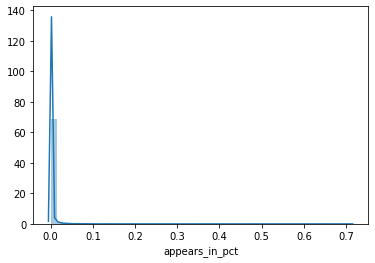

In [192]:
# Frequency of appears in documents
sns.distplot(wc['appears_in_pct']);

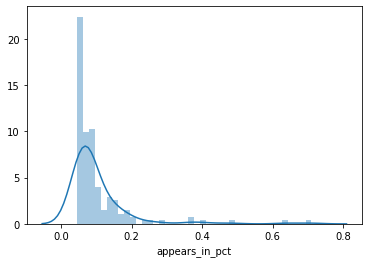

In [197]:
# Tree-Map w/ Words that appear in a least 4.5% of documents. 

wc = wc[wc['appears_in_pct'] >= 0.045]
sns.distplot(wc['appears_in_pct']);

In [198]:
# will keep dropping the more you raise the percentage above
wc.shape

(164, 7)

In [199]:
shops["spacey_tokens2"]

0       [   , checkin, love, love, loved, atmosphere, ...
1       [listed, date, night, austin, ambiance, austin...
2       [   , checkin, listed, brunch, spots, loved, e...
3       [cool, decor, good, drinks, nice, seating,  , ...
4       [   , checkin, located, northcross, mall, shop...
                              ...                        
7611    [actually, step, restaurant, chance, favorites...
7612    [ok, steeping, room, awesome, great, menu, ite...
7613    [loved, coming, tea, atmosphere, pretty, fresh...
7614    [food, average, booths, didnt, feel, clean, wa...
7615    [finally, stopped, lunch, colleague, im, glad,...
Name: spacey_tokens2, Length: 7616, dtype: object

In [201]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

words = ["wolf", "wolves"]
words2 = ["analysis", "analyze", "analyzing"]

for word in words:
    print(ps.stem(word))
    
for word in words2:
    print(ps.stem(word))

wolf
wolv
analysi
analyz
analyz


In [202]:
# Put in a new column `stems`
shops["stems"] = shops["spacey_tokens2"].apply(lambda x: [ps.stem(token) for token in x])

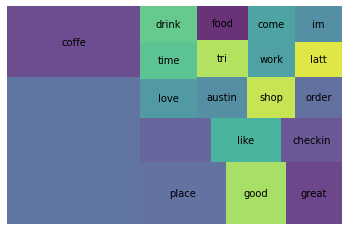

In [204]:
# visualize stems
wc = count(shops['stems'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [206]:
sent = "This is the start of our NLP adventures. We started here with Spacy. We are starting here with NLP."

nlp = spacy.load("en_core_web_lg")

doc = nlp(sent)

# Lemma Attributes
for token in doc:
    print(token.text, "  ", token.lemma_)

This    this
is    be
the    the
start    start
of    of
our    -PRON-
NLP    NLP
adventures    adventure
.    .
We    -PRON-
started    start
here    here
with    with
Spacy    Spacy
.    .
We    -PRON-
are    be
starting    start
here    here
with    with
NLP    NLP
.    .


In [207]:
# Wrap it all in a function
def get_lemmas(text):
    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [209]:
shops.head(1)

,coffee_shop_name,full_review_text,star_rating,no_date,spacey_tokens,spacey_tokens2,stems
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,checkin love love loved the atmosphere ever...,"[ , checkin, love, love, loved, the, atmosph...","[ , checkin, love, love, loved, atmosphere, ...","[ , checkin, love, love, love, atmospher, co..."


In [210]:
shops['lemmas'] = shops['no_date'].apply(get_lemmas)

In [211]:
shops['lemmas'].head()

0    [   , checkin, love, love, love, atmosphere, c...
1    [  , list, date, night, austin, ambiance, aust...
2    [   , checkin, list, brunch, spot, love, eclec...
3    [  , cool, decor, good, drink, nice, seating, ...
4    [   , checkin, locate, northcross, mall, shopp...
Name: lemmas, dtype: object

In [212]:
wc = count(df['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

NameError: name 'df' is not defined

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

